# Appendix B (Deep Learning)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("MHPIquarter.csv",header = 0, index_col = 0)
data.tail()

,House Price Index
Date,
01/10/2021,205.0
01/01/2022,205.9
01/04/2022,207.8
01/07/2022,212.4
01/10/2022,213.0


In [2]:
data.describe()

,House Price Index
count,52.000000
mean,166.405769
std,36.128417
min,97.200000
25%,136.850000
50%,176.450000
75%,198.975000
max,213.000000


In [3]:
#Split data training (in-sample) & testing (out-sample)
training = data[0:42] 
testing = data[42:] 

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
scaler.fit(training[['House Price Index']])
scaled_train_data = scaler.transform(training[['House Price Index']])
scaled_test_data = scaler.transform(testing[['House Price Index']])

In [6]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 10
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# Reduce the model complexity: 
# With a limited amount of data, a complex model may lead to overfitting. 
# You can reduce the number of LSTM units in each layer or decrease the number of layers in the model. 
# For example, you could try using fewer units, such as LSTM(64) or even LSTM(32)
# Modify the model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(n_input, n_features)))
lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dense(5))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Print the model summary
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 29,483
Trainable params: 29,483
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the model with modified settings
lstm_model.fit_generator(generator,epochs=10)

Epoch 1/10


C:\Users\Asus\AppData\Local\Temp\ipykernel_3572\982418532.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  lstm_model.fit_generator(generator,epochs=10)


32/32 [==============================] - 4s 8ms/step - loss: 0.1078
Epoch 2/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 5.1933e-04
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 5.5601e-04
Epoch 6/10
32/32 [==============================] - 0s 8ms/step - loss: 4.5186e-04
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 5.3774e-04
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: 7.1869e-04
Epoch 9/10
32/32 [==============================] - 0s 9ms/step - loss: 7.6774e-04
Epoch 10/10
32/32 [==============================] - 0s 9ms/step - loss: 4.1424e-04


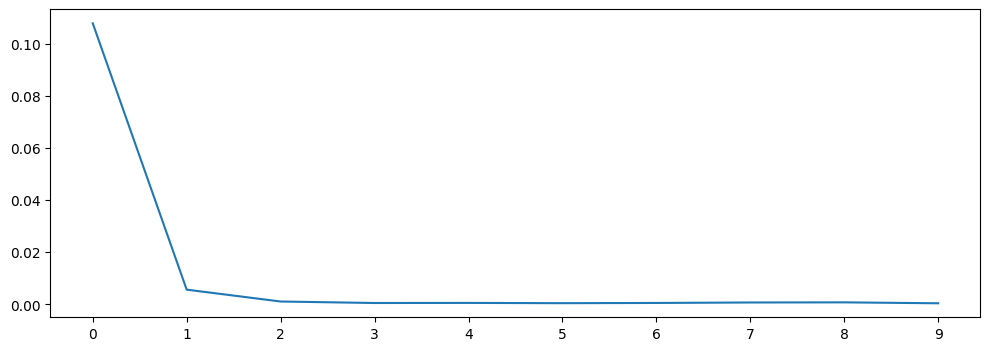

In [9]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [10]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(testing)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [11]:
lstm_predictions_scaled

[array([1.0299087], dtype=float32),
 array([1.0376477], dtype=float32),
 array([1.045003], dtype=float32),
 array([1.051794], dtype=float32),
 array([1.0591698], dtype=float32),
 array([1.0665799], dtype=float32),
 array([1.0734533], dtype=float32),
 array([1.0796205], dtype=float32),
 array([1.0864625], dtype=float32),
 array([1.0929877], dtype=float32)]

In [12]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [13]:
lstm_predictions

array([[203.48657341],
       [204.28524513],
       [205.04431543],
       [205.74514618],
       [206.50632019],
       [207.27104959],
       [207.9803813 ],
       [208.61683359],
       [209.32292976],
       [209.99632616]])

In [14]:
testing['LSTM_Predictions'] = lstm_predictions

C:\Users\Asus\AppData\Local\Temp\ipykernel_3572\2224942254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['LSTM_Predictions'] = lstm_predictions


In [15]:
testing

,House Price Index,LSTM_Predictions
Date,,
01/07/2020,199.9,203.486573
01/10/2020,201.2,204.285245
01/01/2021,201.1,205.044315
01/04/2021,202.5,205.745146
01/07/2021,202.0,206.506320
01/10/2021,205.0,207.271050
01/01/2022,205.9,207.980381
01/04/2022,207.8,208.616834
01/07/2022,212.4,209.322930


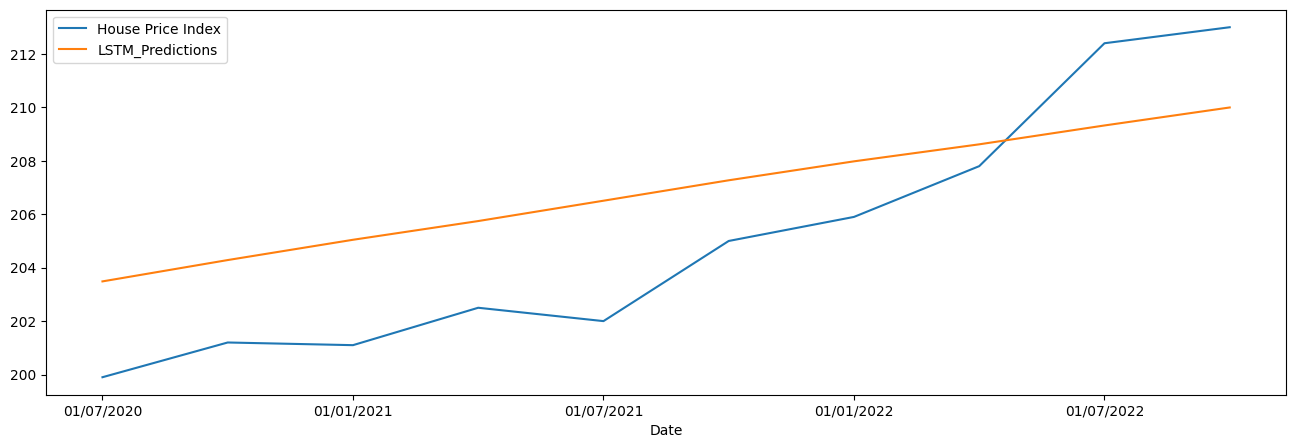

In [16]:
testing['House Price Index'].plot(figsize = (16,5), legend=True)
testing['LSTM_Predictions'].plot(legend = True);

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the mae, mse ,rmse
mae = mean_absolute_error(testing['House Price Index'], testing['LSTM_Predictions'])
mse = mean_squared_error(testing['House Price Index'], testing['LSTM_Predictions'])
rmse = np.sqrt(mean_squared_error(testing['House Price Index'], testing['LSTM_Predictions']))
# Print the MSE
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 9.742105347179308
RMSE: 3.1212345870150977
MAE: 2.961660890579219


In [18]:
n_periods = 32  # Number of periods to forecast

lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(n_periods):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[lstm_pred]], axis=1)

# Rescale the predicted values to the original scale
lstm_predictions2 = scaler.inverse_transform(lstm_predictions_scaled)

1/1 [==============================] - 0s 10ms/step


In [20]:
lstm_predictions2
lstm= pd.DataFrame(lstm_predictions2)
lstm.to_csv('HPI_lstm.csv')

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("HPI_lstm_final.csv",header = 0, index_col = 0)
data.tail()

,House Price Index
Date,
01/10/2029,281.364755
01/01/2030,287.308831
01/04/2030,293.835254
01/07/2030,301.039526
01/10/2030,309.037390


In [22]:
data.describe()

,House Price Index
count,84.000000
mean,195.852727
std,50.532949
min,97.200000
25%,162.150000
50%,200.150000
75%,224.922070
max,309.037390


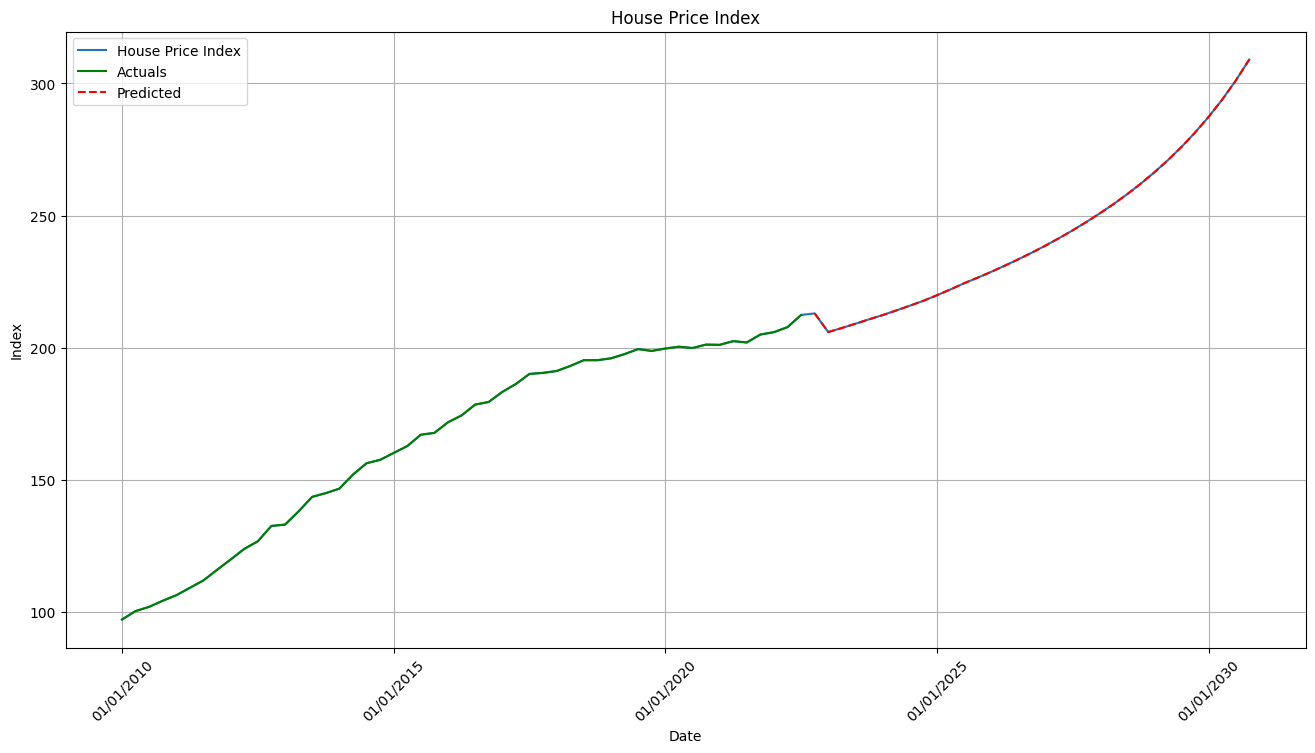

In [26]:
from matplotlib import pyplot as plt

# Plot the entire data
data.plot(figsize=(16, 8), title='House Price Index', fontsize=10)

# Define the start and end indices
start_index = 51
end_index = 84

# Plot the first segment with a solid green line
plt.plot(data.index[:start_index], data['House Price Index'][:start_index], color='green', linestyle='solid', label='Actuals')

# Plot the second segment with a dashed yellow line
plt.plot(data.index[start_index:end_index + 1], data['House Price Index'][start_index:end_index + 1], color='red', linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Index')

# Add gridlines
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()
